In [1]:
import numpy as np
import pandas as pd

In [2]:
file_path = 'asdf_single_log.csv'

x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
y_names = ['a', 's', 'd', 'f', 'None']

col_names = x_names + y_names

df = pd.read_csv(file_path, names=col_names)
df.head()

,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L19y,L19z,L20x,L20y,L20z,a,s,d,f,None
0,0.784137,0.571423,-0.000070,0.717472,0.588176,-0.019694,0.677530,0.638703,-0.053698,0.655191,...,0.840377,-0.125986,0.778810,0.874677,-0.121082,0,0,0,0,NaN
1,0.788276,0.570284,-0.000059,0.716185,0.588995,-0.011217,0.675919,0.639470,-0.042548,0.655003,...,0.844294,-0.125256,0.780763,0.876653,-0.116899,0,0,0,0,NaN
2,0.786306,0.569776,-0.000071,0.715083,0.587393,-0.018008,0.674956,0.636717,-0.051495,0.653109,...,0.841617,-0.119656,0.779967,0.873632,-0.110956,0,0,0,0,NaN
3,0.785780,0.570257,-0.000058,0.715375,0.589984,-0.015940,0.675341,0.638634,-0.047662,0.654607,...,0.838399,-0.119746,0.787253,0.870319,-0.111778,0,0,0,0,NaN
4,0.785705,0.572603,-0.000063,0.715555,0.591844,-0.016335,0.675516,0.641593,-0.049657,0.653885,...,0.837749,-0.123455,0.791014,0.870493,-0.115880,0,0,0,0,NaN


In [3]:
y_names_origin = ['a', 's', 'd', 'f']

for row in range(len(df)):
    df['None'].iloc[row] = 1
    for value in df[y_names_origin].iloc[row]:
        if value == 1:
            df['None'].iloc[row] = 0
            break

C:\Users\honey\anaconda3\envs\sib\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
import sys, os
sys.path.append(os.pardir)

from visualization.smoother import gamma_smoothing, average_smoothing

In [5]:
df = gamma_smoothing(df)  # takes about 1 min
# df = average_smoothing(df)
df.head()

C:\Users\honey\anaconda3\envs\sib\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L19y,L19z,L20x,L20y,L20z,a,s,d,f,None
0,0.784137,0.571423,-0.000070,0.717472,0.588176,-0.019694,0.677530,0.638703,-0.053698,0.655191,...,0.840377,-0.125986,0.778810,0.874677,-0.121082,0,0,0,0,1.0
1,0.785793,0.570967,-0.000066,0.716957,0.588504,-0.016303,0.676886,0.639010,-0.049238,0.655116,...,0.841944,-0.125694,0.779591,0.875467,-0.119409,0,0,0,0,1.0
2,0.785998,0.570491,-0.000068,0.716208,0.588059,-0.016985,0.676114,0.638093,-0.050141,0.654313,...,0.841813,-0.123279,0.779742,0.874733,-0.116028,0,0,0,0,1.0
3,0.785911,0.570397,-0.000064,0.715875,0.588829,-0.016567,0.675805,0.638309,-0.049149,0.654431,...,0.840447,-0.121866,0.782746,0.872968,-0.114328,0,0,0,0,1.0
4,0.785828,0.571280,-0.000064,0.715747,0.590035,-0.016474,0.675689,0.639623,-0.049352,0.654212,...,0.839368,-0.122501,0.786053,0.871978,-0.114949,0,0,0,0,1.0


In [6]:
# normalization, about 1 min

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

for column in x_names:
	df_column = df[column]
	df_column = df_column.values.reshape(-1, 1)
	df_column = scaler.fit_transform(df_column)

	for row in range(len(df)):
		df[column].iloc[row] = df_column[row]


nda3\envs\sib\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\honey\anaconda3\envs\sib\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\honey\anaconda3\envs\sib\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [7]:
# x, y split
x, y = df[x_names], df[y_names]

In [9]:
# train, test split
train_test_ratio = 0.7

train_num = int(len(df) * 0.7)

x_train, x_test = x[:train_num], x[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

# train_test_ratio = 0.2

# train_num = int(len(df) * 0.2)

# x_train, x_test = x[train_num:], x[:train_num]
# y_train, y_test = y[train_num:], y[:train_num]

In [31]:
# apply mlp

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(63,)),
    tf.keras.layers.Dense(32, activation='relu'),   
    tf.keras.layers.Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [32]:
model.fit(x_train, y_train, epochs=100)

model.evaluate(x_test, y_test, verbose=2)

Epoch 1/100
30/30 [==============================] - 1s 1ms/step - loss: 1.3324 - accuracy: 0.4703
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 1.1789 - accuracy: 0.5563
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 1.1400 - accuracy: 0.5552
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 1.1031 - accuracy: 0.5626
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 1.0655 - accuracy: 0.5775
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 1.0325 - accuracy: 0.5881
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 1.0025 - accuracy: 0.6104
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9699 - accuracy: 0.6104
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9453 - accuracy: 0.6189
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 0.9169 - accuracy: 0.6295
Epoch 11/

[0.7723057270050049, 0.5901234745979309]

In [59]:
predict = model.predict(x_test)

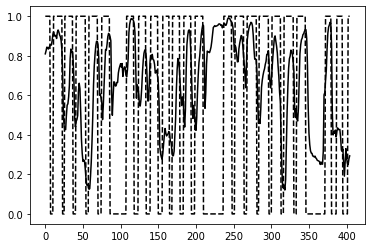

In [60]:
import matplotlib.pyplot as plt

size = len(y_test)

plt.plot(range(size), y_test['None'], 'k--')
plt.plot(range(size), predict[:,4], 'k')

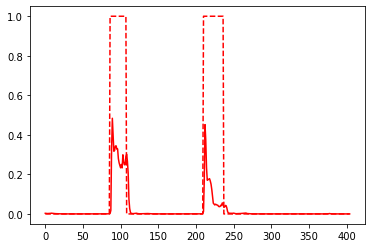

In [61]:
plt.plot(range(size), y_test['a'], 'r--')
plt.plot(range(size), predict[:,0], 'r')


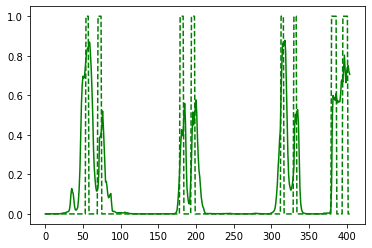

In [62]:
plt.plot(range(size), y_test['s'], 'g--')
plt.plot(range(size), predict[:,1], 'g')

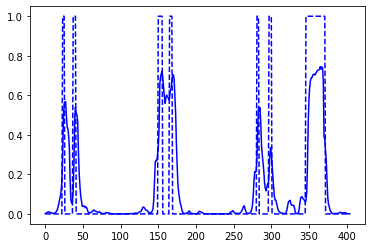

In [63]:
plt.plot(range(size), y_test['d'], 'b--')
plt.plot(range(size), predict[:,2], 'b')

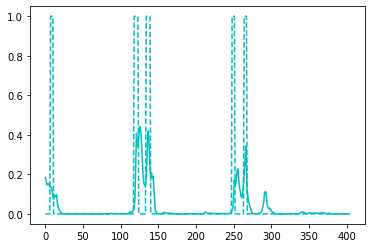

In [64]:
plt.plot(range(size), y_test['f'], 'c--')
plt.plot(range(size), predict[:,3], 'c')

In [65]:
def up_sensivity(data, sensivity=2):

    denominator = (sensivity * sum(data) - (sensivity - 1)* data[4])
    
    data[0], data[1], data[2], data[3], data[4] = (
    sensivity * data[0] / denominator,
    sensivity * data[1] / denominator,
    sensivity * data[2] / denominator,
    sensivity * data[3] / denominator,
    data[4] / denominator
    )

    return data
    

In [66]:
for row in range(len(predict)):
    predict[row] = up_sensivity(predict[row], 8)

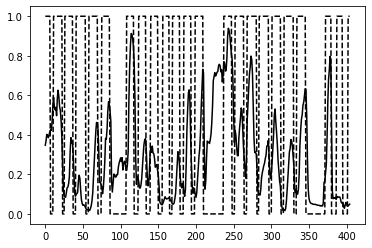

In [67]:
plt.plot(range(size), y_test['None'], 'k--')
plt.plot(range(size), predict[:,4], 'k')

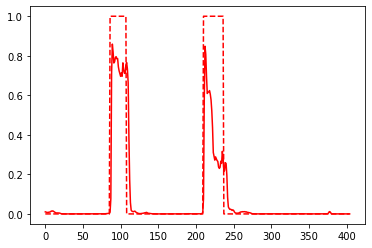

In [68]:
plt.plot(range(size), y_test['a'], 'r--')
plt.plot(range(size), predict[:,0], 'r')

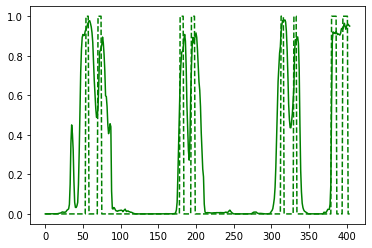

In [69]:
plt.plot(range(size), y_test['s'], 'g--')
plt.plot(range(size), predict[:,1], 'g')

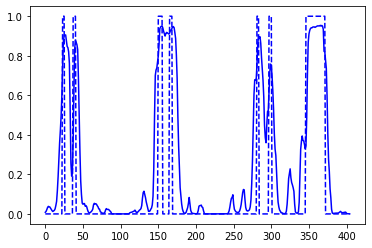

In [70]:
plt.plot(range(size), y_test['d'], 'b--')
plt.plot(range(size), predict[:,2], 'b')

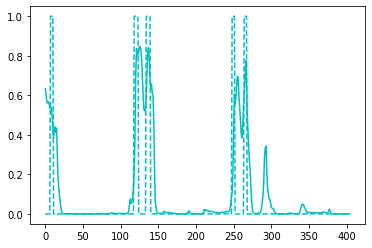

In [71]:
plt.plot(range(size), y_test['f'], 'c--')
plt.plot(range(size), predict[:,3], 'c')